<a href="https://colab.research.google.com/github/priyankabhoi23/movie_recommendation/blob/main/ybifinalproj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Title of Project**
**Movie Recommendation System**

## **Objective**
The objective of this project is to develop a system that recommends movies to users based on their past preferences and behavior.

## **Data Source**
https://github.com/YBI-Foundation/Dataset/raw/main/Movies%20Recommendation.csv

## **Import Library**

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.preprocessing import MinMaxScaler


##**Import Data**

In [34]:
data=pd.read_csv("https://github.com/YBI-Foundation/Dataset/raw/main/Movies%20Recommendation.csv")

## **Describe Data**

In [35]:
data.head()

,Movie_ID,Movie_Title,Movie_Genre,Movie_Language,Movie_Budget,Movie_Popularity,Movie_Release_Date,Movie_Revenue,Movie_Runtime,Movie_Vote,...,Movie_Homepage,Movie_Keywords,Movie_Overview,Movie_Production_House,Movie_Production_Country,Movie_Spoken_Language,Movie_Tagline,Movie_Cast,Movie_Crew,Movie_Director
0,1,Four Rooms,Crime Comedy,en,4000000,22.876230,09-12-1995,4300000,98.0,6.5,...,NaN,hotel new year's eve witch bet hotel room,It's Ted the Bellhop's first night on the job....,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Twelve outrageous guests. Four scandalous requ...,Tim Roth Antonio Banderas Jennifer Beals Madon...,"[{'name': 'Allison Anders', 'gender': 1, 'depa...",Allison Anders
1,2,Star Wars,Adventure Action Science Fiction,en,11000000,126.393695,25-05-1977,775398007,121.0,8.1,...,http://www.starwars.com/films/star-wars-episod...,android galaxy hermit death star lightsaber,Princess Leia is captured and held hostage by ...,"[{""name"": ""Lucasfilm"", ""id"": 1}, {""name"": ""Twe...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","A long time ago in a galaxy far, far away...",Mark Hamill Harrison Ford Carrie Fisher Peter ...,"[{'name': 'George Lucas', 'gender': 2, 'depart...",George Lucas
2,3,Finding Nemo,Animation Family,en,94000000,85.688789,30-05-2003,940335536,100.0,7.6,...,http://movies.disney.com/finding-nemo,father son relationship harbor underwater fish...,"Nemo, an adventurous young clownfish, is unexp...","[{""name"": ""Pixar Animation Studios"", ""id"": 3}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","There are 3.7 trillion fish in the ocean, they...",Albert Brooks Ellen DeGeneres Alexander Gould ...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton
3,4,Forrest Gump,Comedy Drama Romance,en,55000000,138.133331,06-07-1994,677945399,142.0,8.2,...,NaN,vietnam veteran hippie mentally disabled runni...,A man with a low IQ has accomplished great thi...,"[{""name"": ""Paramount Pictures"", ""id"": 4}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","The world will never be the same, once you've ...",Tom Hanks Robin Wright Gary Sinise Mykelti Wil...,"[{'name': 'Alan Silvestri', 'gender': 2, 'depa...",Robert Zemeckis
4,5,American Beauty,Drama,en,15000000,80.878605,15-09-1999,356296601,122.0,7.9,...,http://www.dreamworks.com/ab/,male nudity female nudity adultery midlife cri...,"Lester Burnham, a depressed suburban father in...","[{""name"": ""DreamWorks SKG"", ""id"": 27}, {""name""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Look closer.,Kevin Spacey Annette Bening Thora Birch Wes Be...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4760 entries, 0 to 4759
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Movie_ID                  4760 non-null   int64  
 1   Movie_Title               4760 non-null   object 
 2   Movie_Genre               4760 non-null   object 
 3   Movie_Language            4760 non-null   object 
 4   Movie_Budget              4760 non-null   int64  
 5   Movie_Popularity          4760 non-null   float64
 6   Movie_Release_Date        4760 non-null   object 
 7   Movie_Revenue             4760 non-null   int64  
 8   Movie_Runtime             4758 non-null   float64
 9   Movie_Vote                4760 non-null   float64
 10  Movie_Vote_Count          4760 non-null   int64  
 11  Movie_Homepage            1699 non-null   object 
 12  Movie_Keywords            4373 non-null   object 
 13  Movie_Overview            4757 non-null   object 
 14  Movie_Pr

In [37]:
data.describe()

,Movie_ID,Movie_Budget,Movie_Popularity,Movie_Revenue,Movie_Runtime,Movie_Vote,Movie_Vote_Count
count,4760.000000,4.760000e+03,4760.000000,4.760000e+03,4758.000000,4760.000000,4760.000000
mean,2382.566387,2.920129e+07,21.599510,8.263743e+07,107.184111,6.113866,692.508403
std,1377.270159,4.075620e+07,31.887919,1.630554e+08,21.960332,1.141294,1235.007337
min,1.000000,0.000000e+00,0.000372,0.000000e+00,0.000000,0.000000,0.000000
25%,1190.750000,9.257500e+05,4.807074,0.000000e+00,94.000000,5.600000,55.000000
50%,2380.500000,1.500000e+07,13.119058,1.944716e+07,104.000000,6.200000,238.000000
75%,3572.250000,4.000000e+07,28.411929,9.341276e+07,118.000000,6.800000,740.250000
max,4788.000000,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


## **Data Visualization**

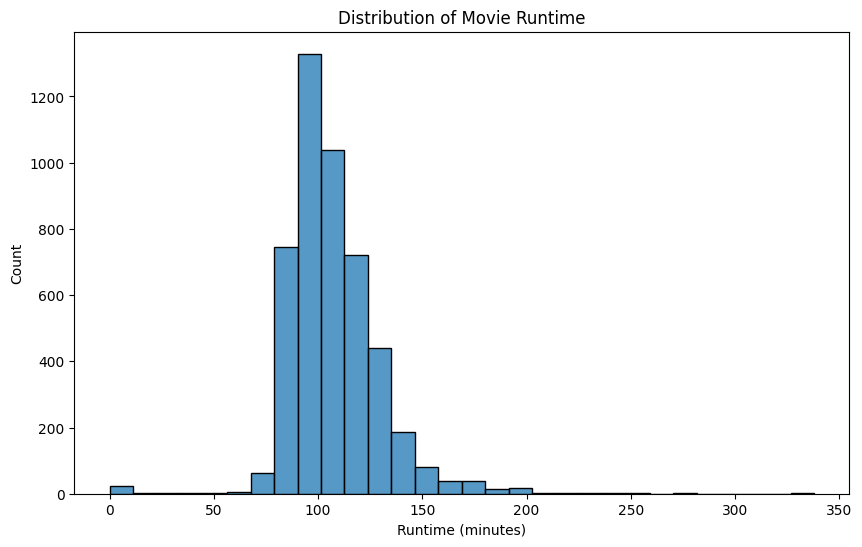

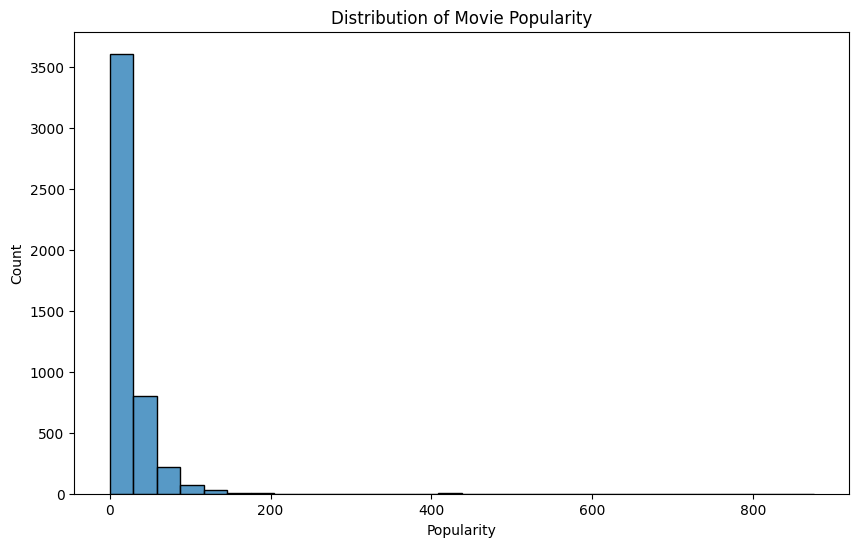

In [38]:
# Plotting distribution of movie runtime
plt.figure(figsize=(10, 6))
sns.histplot(data['Movie_Runtime'].dropna(), bins=30)
plt.title('Distribution of Movie Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Count')
plt.show()

# Plotting distribution of movie popularity
plt.figure(figsize=(10, 6))
sns.histplot(data['Movie_Popularity'], bins=30)
plt.title('Distribution of Movie Popularity')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.show()


## **Data Preprocessing**

In [39]:
# Fill missing values for text fields with an empty string
text_columns = ['Movie_Genre', 'Movie_Keywords', 'Movie_Overview', 'Movie_Tagline']
for col in text_columns:
    data[col].fillna('', inplace=True)

# Fill missing values for numeric fields with the median value
data['Movie_Runtime'].fillna(data['Movie_Runtime'].median(), inplace=True)

# Feature scaling for numeric features
scaler = MinMaxScaler()
data[['Movie_Popularity', 'Movie_Vote', 'Movie_Vote_Count']] = scaler.fit_transform(data[['Movie_Popularity', 'Movie_Vote', 'Movie_Vote_Count']])


##**Define Target Variable (y) and Feature Variables (X)**

In [40]:
# Combine important textual features
data['combined_features'] = data['Movie_Genre'] + ' ' + data['Movie_Keywords'] + ' ' + data['Movie_Overview'] + ' ' + data['Movie_Tagline']


## **Train Test Split**
For content-based recommendation systems, we typically do not need a train-test split as we are not predicting a target variable but rather calculating similarities.


## **Modeling**

In [41]:
# TF-IDF Vectorizer to convert text data to feature vectors
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['combined_features'])

# Compute cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)


## **Model Evaluation**

In [42]:
# Create a reverse mapping of movie titles to indices
indices = pd.Series(data.index, index=data['Movie_Title']).drop_duplicates()

# Function to get recommendations based on cosine similarity
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return data['Movie_Title'].iloc[movie_indices]

# Example usage
print(get_recommendations('The Dark Knight'))


3450                      The Dark Knight Rises
4114    Batman: The Dark Knight Returns, Part 2
162                              Batman Returns
123                               Batman Begins
180                              Batman Forever
122                                      Batman
181                              Batman & Robin
3586         Sherlock Holmes: A Game of Shadows
4294         Batman v Superman: Dawn of Justice
2638                                  Slow Burn
Name: Movie_Title, dtype: object


## **Prediction**

In [43]:
# Predicting recommendations for a specific movie
recommendations = get_recommendations('The Dark Knight')
print(recommendations)


3450                      The Dark Knight Rises
4114    Batman: The Dark Knight Returns, Part 2
162                              Batman Returns
123                               Batman Begins
180                              Batman Forever
122                                      Batman
181                              Batman & Robin
3586         Sherlock Holmes: A Game of Shadows
4294         Batman v Superman: Dawn of Justice
2638                                  Slow Burn
Name: Movie_Title, dtype: object


## **Explaination**
The movie recommendation system built here uses content-based filtering to recommend movies to users. The system leverages features like genre, keywords, overview, and tagline to create a combined feature set for each movie. Using the TF-IDF vectorizer, these combined features are converted into numerical vectors, and cosine similarity is computed between these vectors to measure similarity between movies. The system can recommend movies similar to a given movie title based on these similarities. The recommendation function finds the top 10 most similar movies to a given movie title based on the computed cosine similarity scores
